In [1]:
library(ggplot2)
library(xtable)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
nazare = na.omit(read.csv("data/Nazare.csv"))
jaws = na.omit(read.csv("data/Jaws.csv"))

In [3]:
summary(nazare[,2:3])

      Wave             Wind       
 Min.   : 0.000   Min.   : 0.000  
 1st Qu.: 1.600   1st Qu.: 5.000  
 Median : 2.100   Median : 8.000  
 Mean   : 2.414   Mean   : 8.666  
 3rd Qu.: 3.000   3rd Qu.:11.000  
 Max.   :11.400   Max.   :38.000  

In [4]:
print(xtable(summary(nazare[,2:3])), file = "tables/summary_nazare.tex", compress = FALSE, floating=FALSE, latex.environments=NULL, booktabs=TRUE)
print(xtable(summary(jaws[,2:3])), file = "tables/summary_jaws.tex", compress = FALSE, floating=FALSE, latex.environments=NULL, booktabs=TRUE)

                  Time          Wave            Wind       
 2006-12-24 14:00:00:  1   Min.   :0.400   Min.   : 1.000  
 2006-12-29 11:00:00:  1   1st Qu.:1.500   1st Qu.: 5.000  
 2006-12-29 14:00:00:  1   Median :2.100   Median : 8.000  
 2006-12-30 08:00:00:  1   Mean   :2.325   Mean   : 8.732  
 2007-01-11 17:00:00:  1   3rd Qu.:2.800   3rd Qu.:11.000  
 2007-01-23 17:00:00:  1   Max.   :8.600   Max.   :27.000  
 (Other)            :494                                   

                  Time          Wave            Wind       
 2006-12-30 08:00:00:  1   Min.   :0.500   Min.   : 0.000  
 2007-01-04 08:00:00:  1   1st Qu.:1.500   1st Qu.: 6.000  
 2007-01-05 17:00:00:  1   Median :2.100   Median : 8.000  
 2007-01-13 14:00:00:  1   Mean   :2.331   Mean   : 8.864  
 2007-01-30 08:00:00:  1   3rd Qu.:2.800   3rd Qu.:11.000  
 2007-02-04 11:00:00:  1   Max.   :7.600   Max.   :26.000  
 (Other)            :494                                   

# Plots

In [6]:
nazare.plt.gg <- ggplot(nazare)

# WIND
nazare.plt.qq_wind <- nazare.plt.gg + 
    stat_qq(aes(sample=Wind)) + stat_qq_line(aes(sample=Wind)) +
    labs(title="Normal QQ plot, Nazaré Wind")

nazare.plt.hist_wind <- nazare.plt.gg +
    geom_histogram(aes(x=Wind)) +
    labs(title="Histogram Nazaré Wind")

#WAVE
nazare.plt.qq_wave <- nazare.plt.gg + 
    stat_qq(aes(sample=Wave)) + stat_qq_line(aes(sample=Wave)) +
    labs(title="Normal QQ plot, Nazaré Wave")

nazare.plt.hist_wave <- nazare.plt.gg +
    geom_histogram(aes(x=Wave)) +
    labs(title="Histogram Nazaré Wave")

# Scatter
aes_ = aes(x=Wind, y=Wave)
nazare.plt.smooth <- nazare.plt.gg +
    geom_jitter(aes_) + stat_density_2d(aes_) + geom_smooth(aes_) +
    labs(title="Nazare")

nazare.plt.bin2d <- nazare.plt.gg +
    geom_bin2d(aes_, binwidth=c(1,0.1)) + 
    scale_fill_viridis_c("", option="plasma") +
    labs(title="Nazare", x="Velocidad del viento (nudos)", y = "Altura Olas (m)")


In [7]:
#Save plots
ggsave("nazare_qq_wind.pdf", path="figures", plot=nazare.plt.qq_wind, width=15, height=15, units='cm')
ggsave("nazare_hist_wind.pdf", path="figures", plot=nazare.plt.hist_wind, width=15, height=15, units='cm')

ggsave("nazare_qq_wave.pdf", path="figures", plot=nazare.plt.qq_wave, width=15, height=15, units='cm')
ggsave("nazare_hist_wave.pdf", path="figures", plot=nazare.plt.hist_wave, width=15, height=15, units='cm')

ggsave("nazare_smooth.pdf", path="figures", plot=nazare.plt.smooth, width=15, height=15, units='cm')
ggsave("nazare_bin2d.pdf", path="figures", plot=nazare.plt.bin2d, width=15, height=15, units='cm')

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


In [8]:
jaws.plt.gg <- ggplot(jaws)

# WIND
jaws.plt.qq_wind <- jaws.plt.gg + 
    stat_qq(aes(sample=Wind)) + stat_qq_line(aes(sample=Wind)) +
    labs(title="Normal QQ plot, Jaws Wind")

jaws.plt.hist_wind <- jaws.plt.gg +
    geom_histogram(aes(x=Wind)) +
    labs(title="Histogram Jaws Wind")

#WAVE
jaws.plt.qq_wave <- jaws.plt.gg + 
    stat_qq(aes(sample=Wave)) + stat_qq_line(aes(sample=Wave)) +
    labs(title="Normal QQ plot, Jaws Wave")

jaws.plt.hist_wave <- jaws.plt.gg +
    geom_histogram(aes(x=Wave)) +
    labs(title="Histogram Jaws Wave")

# Scatter
aes_ = aes(x=Wind, y=Wave)
jaws.plt.smooth <- jaws.plt.gg +
    geom_jitter(aes_) + stat_density_2d(aes_) + geom_smooth(aes_) +
    labs(title="Jaws")

jaws.plt.bin2d <- jaws.plt.gg +
    geom_bin2d(aes_, binwidth=c(1,0.1)) + 
    scale_fill_viridis_c("", option="plasma") +
    labs(title="Jaws", x="Velocidad del viento (nudos)", y = "Altura Olas (m)")

In [9]:
#Save plots
ggsave("jaws_qq_wind.pdf", path="figures", plot=jaws.plt.qq_wind, width=15, height=15, units='cm')
ggsave("jaws_hist_wind.pdf", path="figures", plot=jaws.plt.hist_wind, width=15, height=15, units='cm')

ggsave("jaws_qq_wave.pdf", path="figures", plot=jaws.plt.qq_wave, width=15, height=15, units='cm')
ggsave("jaws_hist_wave.pdf", path="figures", plot=jaws.plt.hist_wave, width=15, height=15, units='cm')


ggsave("jaws_smooth.pdf", path="figures", plot=jaws.plt.smooth, width=15, height=15, units='cm')
ggsave("jaws_bin2d.pdf", path="figures", plot=jaws.plt.bin2d, width=15, height=15, units='cm')

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


In [10]:
boxplot_wave <- nazare.plt.gg +
    geom_boxplot(aes(y=Wave, x="Nazare", fill="Nazare")) +
    geom_boxplot(data=jaws, aes(y=Wave, x="Jaws", fill="Jaws")) + ylim(0, 6.5) +
    scale_colour_manual(name="Location",
    values=c(Nazare="red", Jaws="blue"))

boxplot_wind <- nazare.plt.gg +
    geom_boxplot(data=nazare, aes(y=Wind, x="Nazare", fill="Nazare")) +
    geom_boxplot(data=jaws, aes(y=Wind, x="Jaws", fill="Jaws")) + 
    scale_colour_manual(name="Location",
    values=c(Nazare="red", Jaws="blue"))

In [11]:
ggsave("boxplot_wind.pdf", path="figures", plot=boxplot_wind, width=15, height=15, units='cm')
ggsave("boxplot_wave.pdf", path="figures", plot=boxplot_wave, width=15, height=15, units='cm')

Warning message:
“Removed 288 rows containing non-finite values (stat_boxplot).”

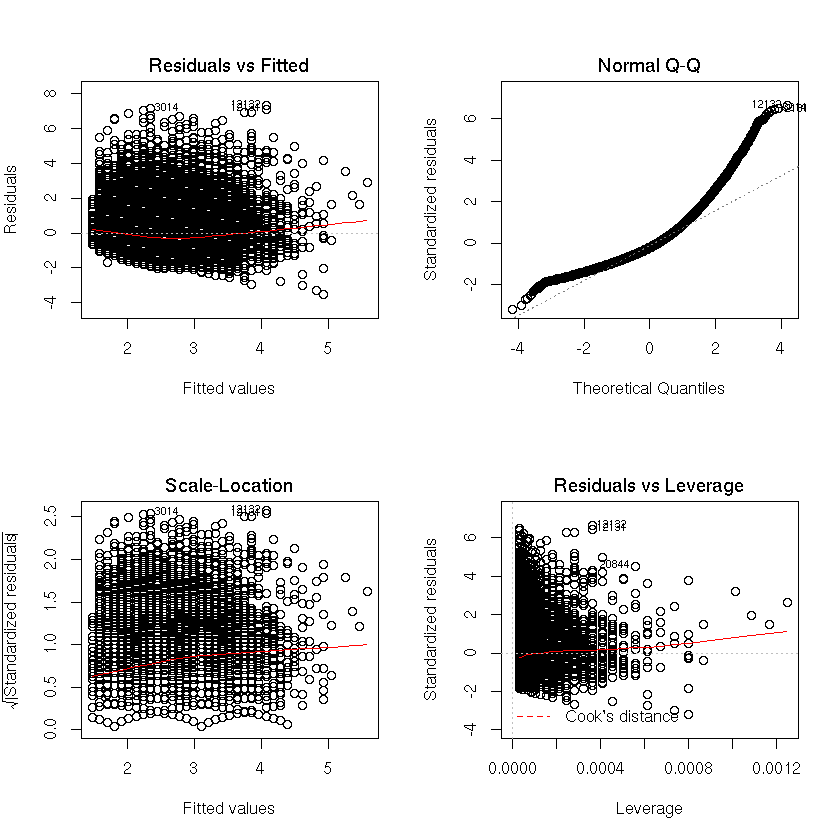

In [12]:
mylinreg = lm(Wave ~ Wind, data = nazare)
par(mfrow = c(2, 2))
plot(mylinreg)

# SubSample

In [13]:
time_between <- function (time, a, b) {
    h <- as.numeric(format(as.POSIXct(time), "%H"))
    (h >= a & h <= b)
}

set.seed(42)
nazare_500 <- sample_n(subset(nazare, time_between(Time, 8, 17)), 500)
summary(nazare_500)

set.seed(43)
jaws_500 <- sample_n(subset(nazare, time_between(Time, 8, 17)), 500)
summary(jaws_500)

                  Time          Wave            Wind       
 2006-12-24 14:00:00:  1   Min.   :0.400   Min.   : 1.000  
 2006-12-29 11:00:00:  1   1st Qu.:1.500   1st Qu.: 5.000  
 2006-12-29 14:00:00:  1   Median :2.100   Median : 8.000  
 2006-12-30 08:00:00:  1   Mean   :2.325   Mean   : 8.732  
 2007-01-11 17:00:00:  1   3rd Qu.:2.800   3rd Qu.:11.000  
 2007-01-23 17:00:00:  1   Max.   :8.600   Max.   :27.000  
 (Other)            :494                                   

                  Time          Wave            Wind       
 2006-12-30 08:00:00:  1   Min.   :0.500   Min.   : 0.000  
 2007-01-04 08:00:00:  1   1st Qu.:1.500   1st Qu.: 6.000  
 2007-01-05 17:00:00:  1   Median :2.100   Median : 8.000  
 2007-01-13 14:00:00:  1   Mean   :2.331   Mean   : 8.864  
 2007-01-30 08:00:00:  1   3rd Qu.:2.800   3rd Qu.:11.000  
 2007-02-04 11:00:00:  1   Max.   :7.600   Max.   :26.000  
 (Other)            :494                                   